#**PRUEBA UNITARIA MODELO: Random Forest**

In [ ]:
# Importar las librerias
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Cargar el archivo csv desde drive
drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/Clima_sin_Presion.csv"
df = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
# Codificar columnas categoricas
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Definir atributos y clase
X = df.drop("Condition", axis=1)
y = df["Condition"]
print(label_encoders["Condition"].classes_)

['Cloudy' 'Considerably Cloudy' 'Fair' 'Fog' 'Haze' 'Heavy Rain'
 'Heavy T-Storm' 'Mist' 'Rain' 'Thunder']


In [ ]:
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [ ]:
# Crear y entrenar el modelo
Modelo_RandomForest = RandomForestClassifier(n_estimators=100, max_depth=200,random_state=0, n_jobs=-1)
Modelo_RandomForest.fit(X_train, y_train)

y_pred = Modelo_RandomForest.predict(X_test)

['Cloudy' 'Considerably Cloudy' 'Fair' 'Fog' 'Haze' 'Heavy Rain'
 'Heavy T-Storm' 'Mist' 'Rain' 'Thunder']


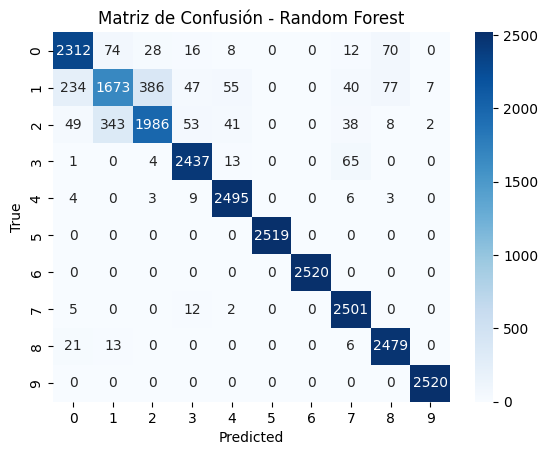

Accuracy: 0.9303488510536969

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      2520
           1       0.80      0.66      0.72      2519
           2       0.83      0.79      0.81      2520
           3       0.95      0.97      0.96      2520
           4       0.95      0.99      0.97      2520
           5       1.00      1.00      1.00      2519
           6       1.00      1.00      1.00      2520
           7       0.94      0.99      0.96      2520
           8       0.94      0.98      0.96      2519
           9       1.00      1.00      1.00      2520

    accuracy                           0.93     25197
   macro avg       0.93      0.93      0.93     25197
weighted avg       0.93      0.93      0.93     25197



In [ ]:
# Mostrar resultados
print(label_encoders["Condition"].classes_)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de Confusión - Random Forest")
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

**###########################################################################################**

#**Guardar el modelo**

In [ ]:
import joblib

# Ruta completa donde quieres guardar el modelo
ruta_modelo = '/content/drive/MyDrive/modelo_random_forest.pkl'

# Guardar el modelo entrenado sin los LabelEncoders
joblib.dump(Modelo_RandomForest, ruta_modelo)

['/content/drive/MyDrive/modelo_random_forest.pkl']

In [ ]:
# Guardar el modelo entrenado CON los LabelEncoders
ruta_modelo = '/content/drive/MyDrive/modelo_random_forest_CATEGORIAS.pkl'

# Crear un diccionario con el modelo y el diccionario de label encoders
obj_guardar = {
    'modelo': Modelo_RandomForest,
    'label_encoders': label_encoders
}

# Guardar todo junto
joblib.dump(obj_guardar, ruta_modelo)

['/content/drive/MyDrive/modelo_random_forest_CATEGORIAS.pkl']